# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.sample(n=4)

,temperature,gender,heart_rate
122,99.0,F,81.0
103,99.4,F,77.0
21,98.2,M,71.0
84,98.6,F,85.0


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [201]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [202]:
df.columns

Index(['temperature', 'gender', 'heart_rate'], dtype='object')

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *
import scipy.stats as stats

# 1- Is the distribution of body temperatures normal?

In [204]:
mean=np.mean(df.temperature)

In [205]:
std=np.std(df.temperature)

In [206]:
sample_normal = np.random.normal(mean, std, size=10000)

In [207]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n=len(data)
    # x-data for the ECDF: x
    x=np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n
    return x, y

In [208]:
x, y=ecdf(df.temperature)

In [209]:
x_theor, y_theor=ecdf(sample_normal)

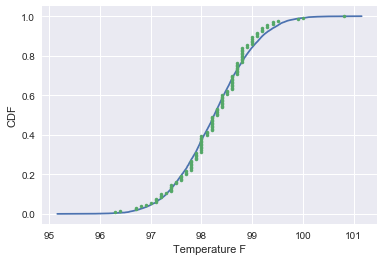

In [210]:
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Temperature F')
_ = plt.ylabel('CDF')
plt.show()

In [211]:
# Body Temperature data set has normal distrubition

In [212]:
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

# 2.a- Is the sample size large? 

# 2.b- Are the observations independent?

# 3- Is the true population mean really 98.6 degrees F?

In [213]:
bs_sample = np.random.choice(df.temperature, size=130)

In [214]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [215]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(df.temperature, np.mean)

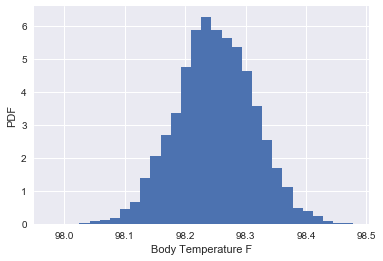

In [216]:
_ = plt.hist(bs_replicates, bins=30, density=True)
_ = plt.xlabel('Body Temperature F')
_ = plt.ylabel('PDF')
plt.show()

In [217]:
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print('p-val =', p)

p-val = 0.0


In [218]:
z = (mean-98.6) / (std/sqrt(len(df)))

In [219]:
z

-5.475925202078116

In [220]:
# sice the z score table is limited with 3.6, so 1/10000 probability, above result is true.
# cross check with scpiy

In [221]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [222]:
# so we can reject the Null Hypotesis and say:
# No, true population mean is not really 98.6 degrees F.

# 4- Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [223]:
bs_sample10 = np.random.choice(df.temperature, size=10)

In [224]:
mean10=np.mean(bs_sample10)

In [225]:
stats.ttest_1samp(bs_sample, 98.6)

Ttest_1sampResult(statistic=-4.992806345281499, pvalue=1.8897490960375167e-06)

In [226]:
# again the p-value will be very small and "null hypothesis" should be rejected

# 5- At what temperature should we consider someone's temperature to be "abnormal"?

In [227]:
# my understanding from this question, the values which are out of confidence interval can be considered abnormal
# So we need only find the confidence interval.
# I did this for both of sample and bs_replicates

In [228]:
conf_int = np.percentile(df.temperature, [2.5, 97.5])
conf_int

array([96.7225, 99.4775])

In [ ]:
# unlike the original sample, bs_replicates don't give a meaningful confidence interval.

In [229]:
conf_int_bs = np.percentile(bs_replicates, [2.5, 97.5])
conf_int_bs

array([98.12538462, 98.37230769])

# 6- Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [230]:
males=df[df.gender=='M']

In [231]:
females=df[df.gender=='F']

In [232]:
males.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [233]:
females.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [235]:
stats.ttest_ind(males['temperature'],females['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

In [244]:
# sice the p value is less than 0.05, we can reject the null hypothesis of "there is no significant difference"

# Conclusion 
Are we getting colder or warmer. Carl Wunderlich's study which was puplished 150 years ago may give a clue about the answer. In mentioned study, the mean of normal body temperature was held to be 37 ∘∘ C or 98.6 ∘∘ F. Question is "is this mean still valid?". We try to find the answer with the help of a sample of 130 observations. We found the mean of this sample as apx 98.25 F which is a different number. But in order to figure out how significant this difference is, we carried out a hypothesis test with to different apporach. with these both approaches, we found that the p-value is very less than the 0.05 significance level .
* We concluded that confidance interval of the Carl Wunderlich's study doesn't cover the curent observations, so the current observations are really different and we need to reject Carl Wunderlich's mean of 98.6.
* And we calculated the confidence interval as 96.7225 - 99.4775. In other words if your body temperature is out of this values, you might be different from the 95% of the population and you may need to visit a doctor.
* And also we found that males are warmer than females.

This results shows us that our average body temperature decreased in 150 years. Can the global warming be the reason of this decrease. Becasue with the global warming we need less resistance to keep the level of our body temperatures. Of course we can not answer this question here, But this might be topic of a scientific research.    